#GROUP11
#Title: Effect of AI-Powered Chatbots on Customer Support Efficiency

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [53]:
#Datasets
customer_satisfaction = pd.read_csv(r'Customer_Survey.csv')
support_ticket = pd.read_csv(r'Customer_Support.csv')
chat_data = pd.read_csv(r'Chat_Team_CaseStudy.csv')

In [55]:
customer_satisfaction.columns = customer_satisfaction.columns.str.strip()
support_ticket.columns = support_ticket.columns.str.strip()
chat_data.columns = chat_data.columns.str.strip()

In [56]:
print("Customer Satisfaction Data:")
customer_satisfaction.head()

Customer Satisfaction Data:


,Customer Name,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,Marisa Obrien,5.0,3.0,4.0,Yes
1,Jessica Rios,3.0,4.0,3.0,Yes
2,Christopher Robbins,4.0,5.0,2.0,Yes
3,Christina Dillon,5.0,3.0,4.0,Yes
4,Alexander Carroll,2.0,5.0,1.0,Yes


In [57]:
print("\nDescriptive Statistics for Customer Satisfaction Data:")
print(customer_satisfaction.describe())


Descriptive Statistics for Customer Satisfaction Data:
       How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
count                                        8125.000000                                                                                                          
mean                                            3.325538                                                                                                          
std                                             1.419858                                                                                                          
min                                             1.000000                                                                                                          
25%                                             2.000000                                                                         

In [58]:
print("\nSupport Ticket Data:")
support_ticket.head()


Support Ticket Data:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [59]:
print("\nDescriptive Statistics for Support Ticket Data:")
print(support_ticket.describe())


Descriptive Statistics for Support Ticket Data:
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [60]:
print("\nChat Data:")
chat_data.head()


Chat Data:


,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Name,Customer Comment,Transferred Chat,Customer Wait Time,Text
0,06-08-2018 23:59,Zaha,00:18:22,Mobile Service Team,Session:2057187615:23360,Customer,True,Edge 16.16299,Windows-10,Sweden,00:01:02,00:00:43,07-08-2018 00:18,Marisa Obrien,,False,00:00:01,I would really like to know the criteria which...
1,06-08-2018 23:59,Berenice,00:03:05,Mobile Technical Team,Session:2057187614:23368,Representative,False,Edge,Windows,Australia,00:00:00,00:00:00,07-08-2018 00:02,Jessica Rios,,True,00:01:01,NaN
2,06-08-2018 23:59,Madi,00:22:33,Mobile Service Team,Session:2057187615:23358,Customer,True,c~67.0.3396.87,Android-4.3,Australia,00:00:32,00:01:28,07-08-2018 00:26,Christopher Robbins,,False,00:00:01,NaN
3,06-08-2018 23:59,Rose,00:38:20,Mobile Service Team,Session:2057187616:18361,System,True,Other,11.4.1,NaN,00:00:37,00:01:18,07-08-2018 00:38,Christina Dillon,,False,00:00:01,Just wondered which airline would give any so...
4,06-08-2018 23:59,Sarrah,00:11:50,Fixed Service Team,Session:2057187617:2598,Representative,True,Other,Android 8.1.0,NaN,00:00:21,00:00:38,07-08-2018 00:14,Alexander Carroll,,False,00:00:01,Do they offer lunch or should we eat outside?


In [61]:
print("\nDescriptive Statistics for Chat Data:")
print(chat_data.describe())


Descriptive Statistics for Chat Data:
       Transaction Start Date   Agent Chat Duration                Teams  \
count                    8469    8469          8469                 8469   
unique                    349     630          2769                    6   
top          06-08-2018 19:54  Sienna      00:03:06  Mobile Service Team   
freq                       45      81           468                 4290   

                    Session Name Chat Closed By Interactive Chat Browser  \
count                       8469           8399             8469    8469   
unique                      8469              3                2     190   
top     Session:2057187615:23360       Customer             True   Other   
freq                           1           3499             6262    4536   

       Operating System        Geo Response Time of Agent  \
count              8469       4638                   8469   
unique              125         46                    133   
top             

In [62]:
#Renaming the customer satisfaction columns
customer_satisfaction.rename(columns={
    'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Overall_delivery',
    'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Quality',
    'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Speed',
    'Was your order accurate? Please respond yes or no.': 'Order_accuracy'
}, inplace=True)

In [63]:
print("Customer Satisfaction Columns:", customer_satisfaction.columns)
print("Support Ticket Columns:", support_ticket.columns)
print("Chat Data Columns:", chat_data.columns)

print("Customer Satisfaction 'Customer Name' present:", 'Customer Name' in customer_satisfaction.columns)
print("Support Ticket 'Customer Name' present:", 'Customer Name' in support_ticket.columns)
print("Chat Data 'Customer Name' present:", 'Customer Name' in chat_data.columns)

Customer Satisfaction Columns: Index(['Customer Name', 'Overall_delivery', 'Quality', 'Speed',
       'Order_accuracy'],
      dtype='object')
Support Ticket Columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
Chat Data Columns: Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Chat Closed By', 'Interactive Chat', 'Browser',
       'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Name',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time', 'Text'],
      dtype='object')
Customer Satisfaction 'Customer Name' present: Tr

In [12]:
# Handle Missing Values
print("\nMissing values in 'Customer Name':")
print("Customer Satisfaction:", customer_satisfaction['Customer Name'].isnull().sum())
print("Support Ticket:", support_ticket['Customer Name'].isnull().sum())
print("Chat Data:", chat_data['Customer Name'].isnull().sum())


Missing values in 'Customer Name':
Customer Satisfaction: 0
Support Ticket: 0
Chat Data: 0


In [13]:
# Remove Duplicates
print("\nDuplicate values in 'Customer Name':")
print("Customer Satisfaction:", customer_satisfaction['Customer Name'].duplicated().sum())
print("Support Ticket:", support_ticket['Customer Name'].duplicated().sum())
print("Chat Data:", chat_data['Customer Name'].duplicated().sum())


Duplicate values in 'Customer Name':
Customer Satisfaction: 441
Support Ticket: 441
Chat Data: 441


In [15]:
# Merge Dataframes
merged_data = pd.merge(customer_satisfaction, support_ticket, on='Customer Name', how='inner')

final_merged_data = pd.merge(merged_data, chat_data, on='Customer Name', how='inner')

# Shape Display
print("\nShape of merged data:", final_merged_data.shape)
print(final_merged_data.head())


Shape of merged data: (12207, 38)
         Customer Name  Overall_delivery  Quality  Speed Order_accuracy  \
0        Marisa Obrien               5.0      3.0    4.0            Yes   
1         Jessica Rios               3.0      4.0    3.0            Yes   
2  Christopher Robbins               4.0      5.0    2.0            Yes   
3     Christina Dillon               5.0      3.0    4.0            Yes   
4    Alexander Carroll               2.0      5.0    1.0            Yes   

   Ticket ID              Customer Email  Customer Age Customer Gender  \
0          1  carrollallison@example.com            32           Other   
1          2    clarkeashley@example.com            42          Female   
2          3   gonzalestracy@example.com            48           Other   
3          4    bradleyolson@example.org            27          Female   
4          5     bradleymark@example.com            67          Female   

  Product Purchased  ...         Browser Operating System        Geo 

In [19]:
# Preprocess Data for Model
from sklearn.impute import SimpleImputer

final_merged_data = final_merged_data.select_dtypes(include=[np.number])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
final_merged_data = pd.DataFrame(imputer.fit_transform(final_merged_data), columns=final_merged_data.columns)

print("\nMissing values after imputation:")
print(final_merged_data.isnull().sum())


Missing values after imputation:
Overall_delivery                0
Quality                         0
Speed                           0
Ticket ID                       0
Customer Age                    0
Customer Satisfaction Rating    0
dtype: int64


In [20]:
print("\nDescriptive Statistics for Chatbot Data:")
print(chat_data.describe())


Descriptive Statistics for Chatbot Data:
       Transaction Start Date   Agent Chat Duration                Teams  \
count                    8469    8469          8469                 8469   
unique                    349     630          2769                    6   
top          06-08-2018 19:54  Sienna      00:03:06  Mobile Service Team   
freq                       45      81           468                 4290   

                    Session Name Chat Closed By Interactive Chat Browser  \
count                       8469           8399             8469    8469   
unique                      8469              3                2     190   
top     Session:2057187615:23360       Customer             True   Other   
freq                           1           3499             6262    4536   

       Operating System        Geo Response Time of Agent  \
count              8469       4638                   8469   
unique              125         46                    133   
top          

In [21]:
X = final_merged_data.drop(columns=['Overall_delivery'])
y = final_merged_data['Overall_delivery']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("Missing values in y_test:", y_test.isnull().sum())


Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_test: 0
Missing values in y_test: 0


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.5140334418936658
R-squared: 0.19800152387465253


In [26]:
print(final_merged_data.columns)

Index(['Overall_delivery', 'Quality', 'Speed', 'Ticket ID', 'Customer Age',
       'Customer Satisfaction Rating'],
      dtype='object')


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = final_merged_data[['Quality', 'Speed', 'Customer Satisfaction Rating']]
y = final_merged_data['Overall_delivery']

X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.5139429429462512
R-squared: 0.19804946206142515


In [28]:
from scipy import stats

final_merged_data['Support_Type'] = final_merged_data['Ticket ID'].apply(lambda x: 'Chatbot' if x % 2 == 0 else 'Human')

chatbot_satisfaction = final_merged_data[final_merged_data['Support_Type'] == 'Chatbot']['Overall_delivery']
human_satisfaction = final_merged_data[final_merged_data['Support_Type'] == 'Human']['Overall_delivery']

# Performing T-test
t_stat, p_val = stats.ttest_ind(chatbot_satisfaction, human_satisfaction, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("There is a significant difference in satisfaction between chatbot and human support.")
else:
    print("No significant difference in satisfaction between chatbot and human support.")

T-statistic: 0.5482728013257618, P-value: 0.5835146279359457
No significant difference in satisfaction between chatbot and human support.


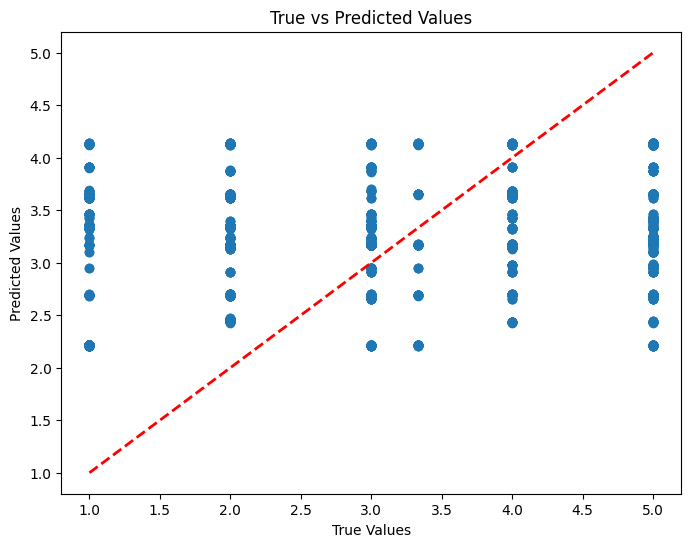


Model training and evaluation complete!


In [29]:
# Plotting the true vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

print("\nModel training and evaluation complete!")

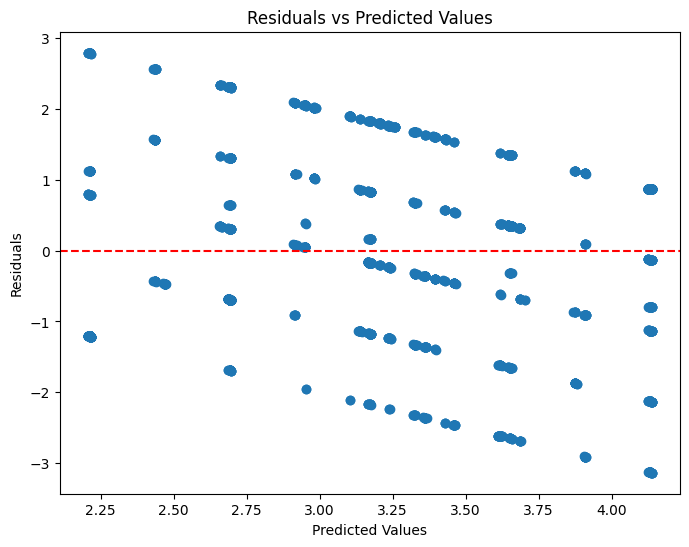

In [30]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [31]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Overall_delivery   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1004.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:19:24   Log-Likelihood:                -19925.
No. Observations:               12207   AIC:                         3.986e+04
Df Residuals:                   12203   BIC:                         3.989e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

# LinearRegression model
model = LinearRegression()

# Performing cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Converting negative MSE scores to positive RMSE
rmse_scores = np.sqrt(-scores)

print(f"Cross-validation RMSE scores: {rmse_scores}")
print(f"Average RMSE: {np.mean(rmse_scores)}")

Cross-validation RMSE scores: [1.18024587 1.29536533 1.20422079 1.26967203 1.25516302]
Average RMSE: 1.2409334092819861


# Iteration 2

Advanced Missing Value Handling


In [33]:
from sklearn.impute import KNNImputer
import pandas as pd

numerical_columns = ['Overall_delivery', 'Quality', 'Speed', 'Customer Age']
final_merged_data[numerical_columns] = final_merged_data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Applying KNN Imputer
imputer = KNNImputer(n_neighbors=5)
final_merged_data[numerical_columns] = imputer.fit_transform(final_merged_data[numerical_columns])

print("Missing values after imputation:")
print(final_merged_data[numerical_columns].isnull().sum())

Missing values after imputation:
Overall_delivery    0
Quality             0
Speed               0
Customer Age        0
dtype: int64


Feature Engineering

In [34]:
final_merged_data['Efficiency Score'] = final_merged_data['Quality'] / (final_merged_data['Speed'] + 1e-6)
final_merged_data['Age Group'] = pd.cut(final_merged_data['Customer Age'], bins=[0, 25, 45, 65, 100], labels=['Youth', 'Adult', 'Middle Age', 'Senior'])

print(final_merged_data[['Efficiency Score', 'Age Group']].head())

   Efficiency Score   Age Group
0          0.750000       Adult
1          1.333333       Adult
2          2.499999  Middle Age
3          0.750000       Adult
4          4.999995      Senior


Cross-Validation and Alternative Models

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = final_merged_data[['Overall_delivery', 'Efficiency Score', 'Speed', 'Customer Age']]
y = final_merged_data['Customer Satisfaction Rating']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Performing K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", cv_scores.mean())
print("Test R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

Cross-Validation R² Scores: [-0.00515892 -0.04288973 -0.02336476 -0.05051309 -0.03833316]
Average R² Score: -0.032051930565959764
Test R² Score: 8.36989971448876e-05
Mean Squared Error (MSE): 0.6555053243067577


 Ethical Analysis

In [37]:
# Analyzing disparities in Customer satisfaction rating by Age Group
age_analysis = final_merged_data.groupby('Age Group').agg({
    'Customer Satisfaction Rating': ['mean', 'std'],
    'Efficiency Score': ['mean', 'std']
})

print("Age Group Analysis:")
print(age_analysis)

Age Group Analysis:
           Customer Satisfaction Rating           Efficiency Score          
                                   mean       std             mean       std
Age Group                                                                   
Youth                          2.992043  0.727719         1.091900  0.589714
Adult                          3.015784  0.809678         1.106867  0.657614
Middle Age                     2.993385  0.811072         1.117585  0.696348
Senior                         2.953079  0.850765         1.127585  0.750376


<ipython-input-37-ca2f6edab98e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = final_merged_data.groupby('Age Group').agg({


 Improved Visualizations


Pair Plot for Feature Relationships

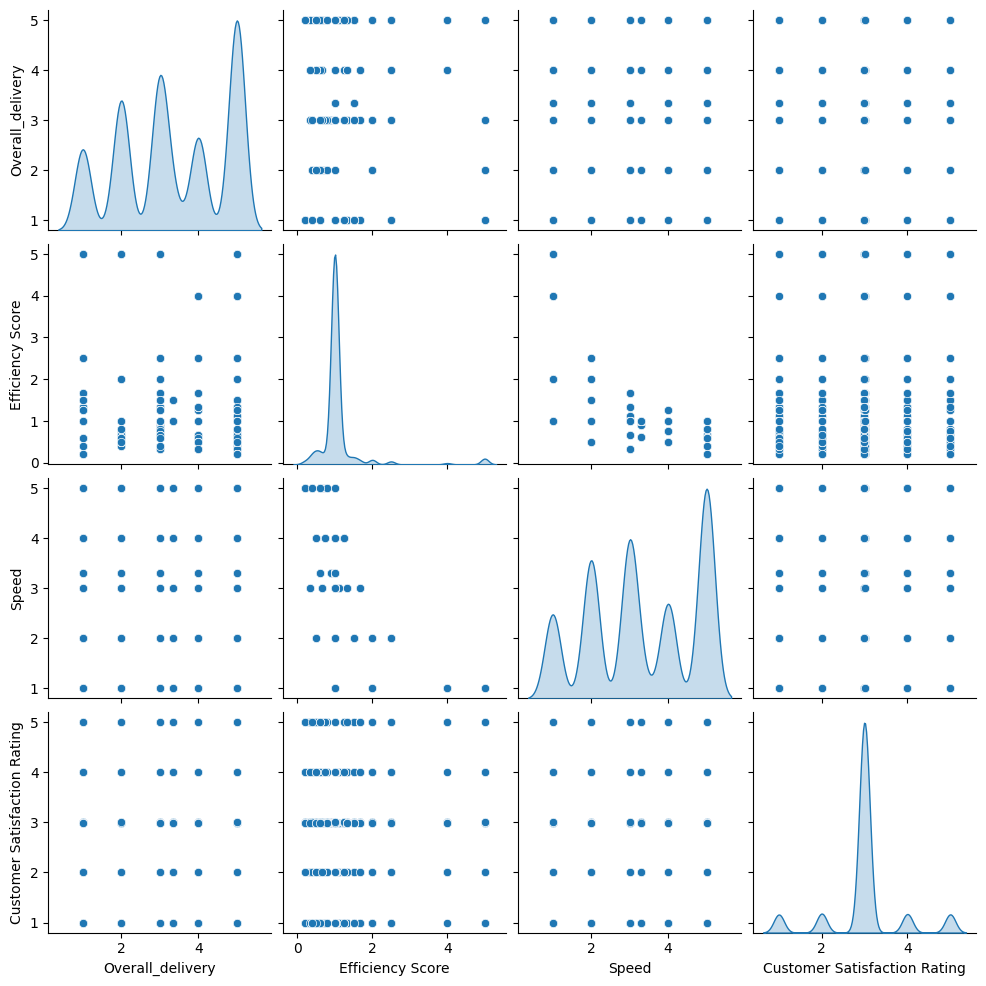

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for key features
sns.pairplot(final_merged_data[['Overall_delivery', 'Efficiency Score', 'Speed', 'Customer Satisfaction Rating']], diag_kind="kde", markers="o")
plt.show()

Interactive Visualization with Plotly

In [39]:
import plotly.express as px

# Scatter plot between Overall Delivery and Customer Satisfaction Rating
fig = px.scatter(
    final_merged_data,
    x='Overall_delivery',
    y='Customer Satisfaction Rating',
    color='Age Group',
    hover_data=['Efficiency Score', 'Speed'],
    title='Overall Delivery vs. Customer Satisfaction Rating by Age Group'
)
fig.show()

# Iteration 3

Residual Analysis

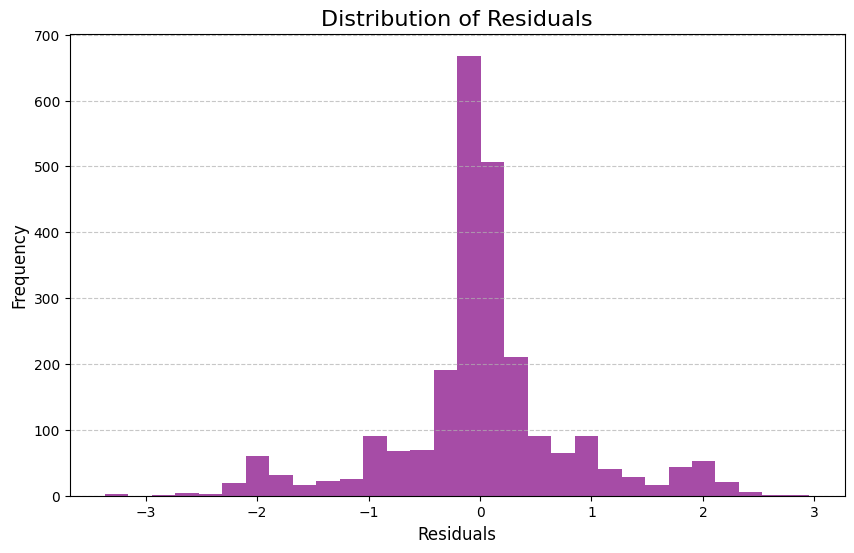

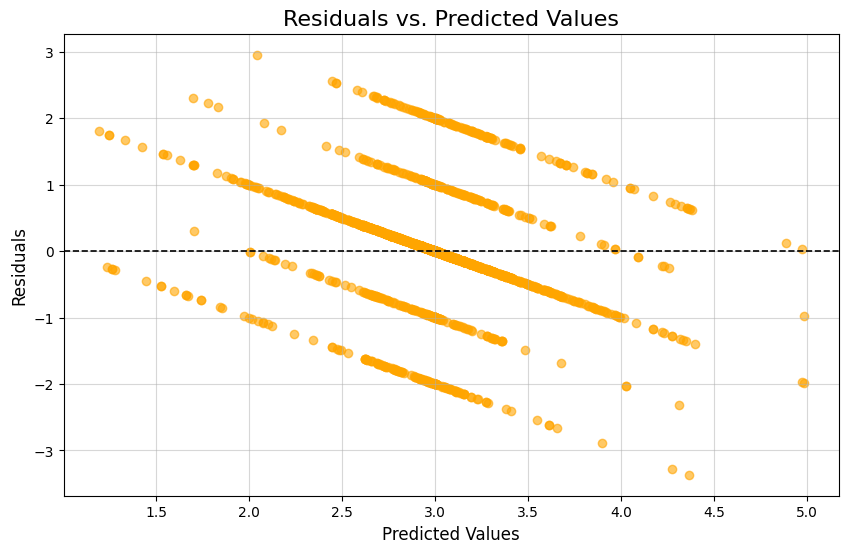

In [40]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residuals distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Residuals vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=1.2)
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


 Feature Importance Analysis

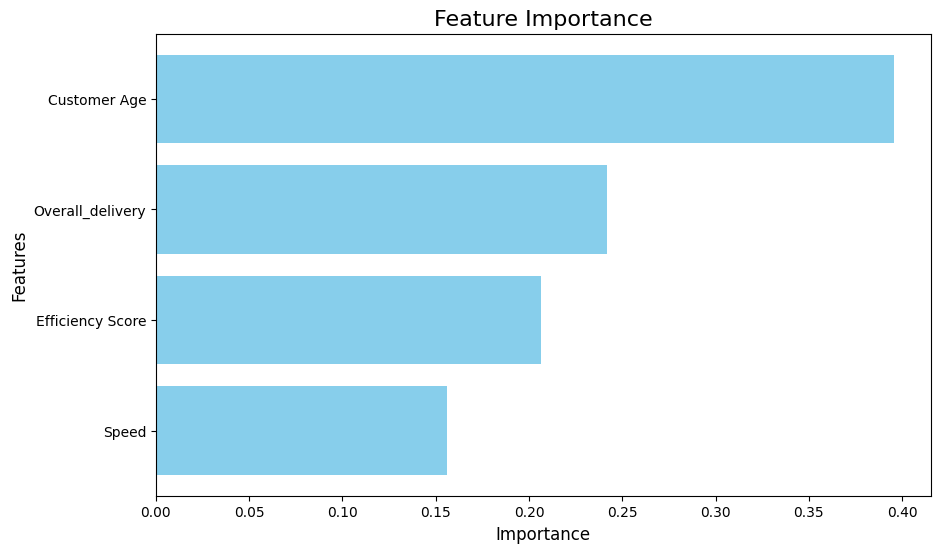

            Feature  Importance
3      Customer Age    0.395607
0  Overall_delivery    0.242004
1  Efficiency Score    0.206286
2             Speed    0.156103


In [41]:
import numpy as np

# Get feature importance from the trained Random Forest model
feature_importance = rf_model.feature_importances_

# Map importance to feature names
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

print(importance_df)


Generalization and Transferability

In [43]:
# Filter data for a specific age group
test_group = final_merged_data[final_merged_data['Age Group'] == 'Adult']
X_transfer = test_group[['Overall_delivery', 'Efficiency Score', 'Speed', 'Customer Age']]
y_transfer = test_group['Customer Satisfaction Rating']

# Make predictions on the new subset
y_transfer_pred = rf_model.predict(X_transfer)

# Evaluate model performance on the transfer set
transfer_r2 = r2_score(y_transfer, y_transfer_pred)
transfer_mse = mean_squared_error(y_transfer, y_transfer_pred)

print("Transferability R² Score:", transfer_r2)
print("Transferability Mean Squared Error (MSE):", transfer_mse)

Transferability R² Score: 0.27022197788243685
Transferability Mean Squared Error (MSE): 0.47832107957030684


Ethical Analysis Expansion

In [44]:
# Group by Age Group and compare predicted vs actual satisfaction ratings
bias_analysis = test_group.copy()
bias_analysis['Predicted Satisfaction'] = y_transfer_pred

group_bias = bias_analysis.groupby('Age Group').agg({
    'Customer Satisfaction Rating': ['mean', 'std'],
    'Predicted Satisfaction': ['mean', 'std']
})

print("Bias Analysis by Age Group:")
print(group_bias)

Bias Analysis by Age Group:
           Customer Satisfaction Rating           Predicted Satisfaction  \
                                   mean       std                   mean   
Age Group                                                                  
Youth                               NaN       NaN                    NaN   
Adult                          3.015784  0.809678               3.008841   
Middle Age                          NaN       NaN                    NaN   
Senior                              NaN       NaN                    NaN   

                      
                 std  
Age Group             
Youth            NaN  
Adult       0.412947  
Middle Age       NaN  
Senior           NaN  


<ipython-input-44-b6004633963a>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Advanced Visualization

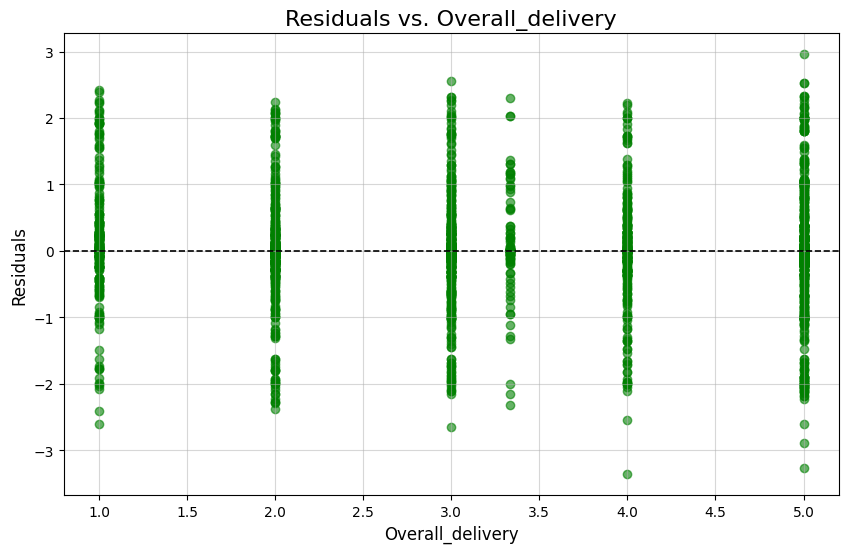

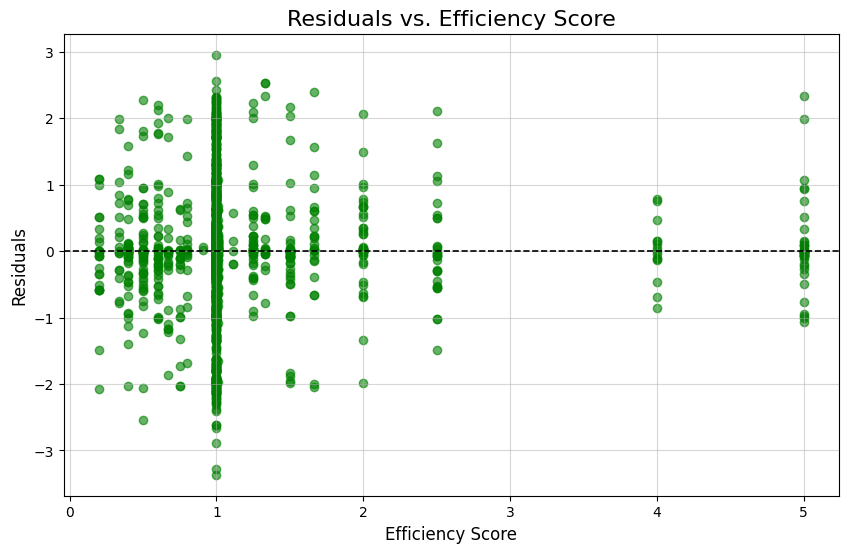

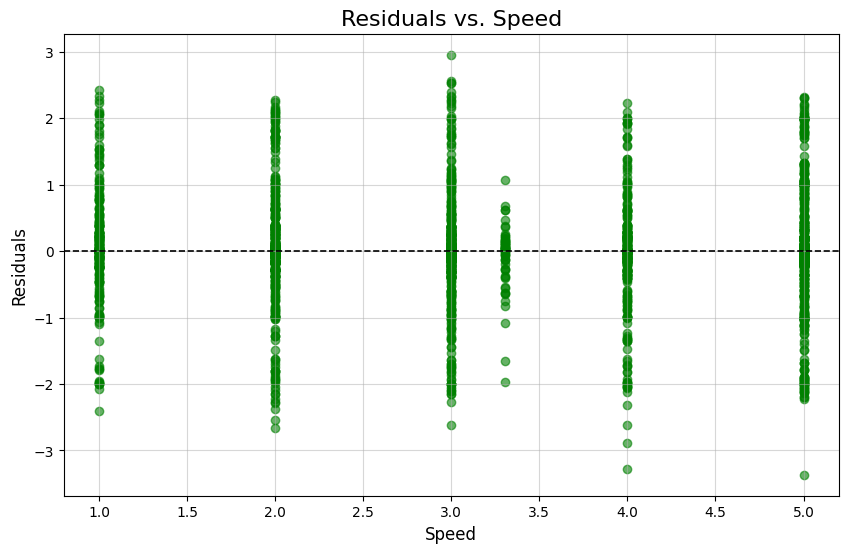

In [45]:
test_indices = X_test.index
final_test_data = final_merged_data.loc[test_indices]

# Scatter plot between residuals and key features
for feature in ['Overall_delivery', 'Efficiency Score', 'Speed']:
    plt.figure(figsize=(10, 6))
    plt.scatter(final_test_data[feature], residuals, alpha=0.6, color='green')
    plt.axhline(0, color='black', linestyle='--', linewidth=1.2)
    plt.title(f'Residuals vs. {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

Residuals by Feature

In [46]:
import plotly.express as px

# Visualization for residuals by feature
fig = px.scatter(
    bias_analysis,
    x='Overall_delivery',
    y='Predicted Satisfaction',
    color='Age Group',
    hover_data=['Efficiency Score', 'Speed', 'Customer Satisfaction Rating'],
    title='Predicted Satisfaction vs. Overall Delivery by Age Group'
)
fig.show()


# Anova

In [76]:
print("Customer Satisfaction Columns:", customer_satisfaction.columns)
print("Support Ticket Columns:", support_ticket.columns)
print("Chat Data Columns:", chat_data.columns)

print("Customer Satisfaction 'Customer Name' present:", 'Customer Name' in customer_satisfaction.columns)
print("Support Ticket 'Customer Name' present:", 'Customer Name' in support_ticket.columns)
print("Chat Data 'Customer Name' present:", 'Customer Name' in chat_data.columns)

Customer Satisfaction Columns: Index(['Customer Name', 'Overall_delivery', 'Quality', 'Speed',
       'Order_accuracy'],
      dtype='object')
Support Ticket Columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
Chat Data Columns: Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Chat Closed By', 'Interactive Chat', 'Browser',
       'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Name',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time', 'Text'],
      dtype='object')
Customer Satisfaction 'Customer Name' present: Tr

In [77]:
import pandas as pd
import scipy.stats as stats

support_ticket_clean = support_ticket.dropna(subset=['Customer Satisfaction Rating', 'Ticket Type'])

print("Unique Ticket Types:", support_ticket_clean['Ticket Type'].unique())

ticket_types = support_ticket_clean['Ticket Type'].unique()

data = [support_ticket_clean[support_ticket_clean['Ticket Type'] == ticket]['Customer Satisfaction Rating']
        for ticket in ticket_types if len(support_ticket_clean[support_ticket_clean['Ticket Type'] == ticket]) > 0]

# Performing ANOVA
if len(data) > 1:
    anova_result = stats.f_oneway(*data)

    print("ANOVA result: F-statistic =", anova_result.statistic, ", p-value =", anova_result.pvalue)

    # Interpretation of the p-value
    if anova_result.pvalue < 0.05:
        print("There is a significant difference in customer satisfaction ratings between the ticket types.")
    else:
        print("There is no significant difference in customer satisfaction ratings between the ticket types.")
else:
    print("Not enough data in the ticket types for ANOVA.")

Unique Ticket Types: ['Technical issue' 'Billing inquiry' 'Cancellation request'
 'Product inquiry' 'Refund request']
ANOVA result: F-statistic = 0.5475445893031419 , p-value = 0.7008416187858786
There is no significant difference in customer satisfaction ratings between the ticket types.


<ipython-input-69-4d260450e334>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-69-4d260450e334>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




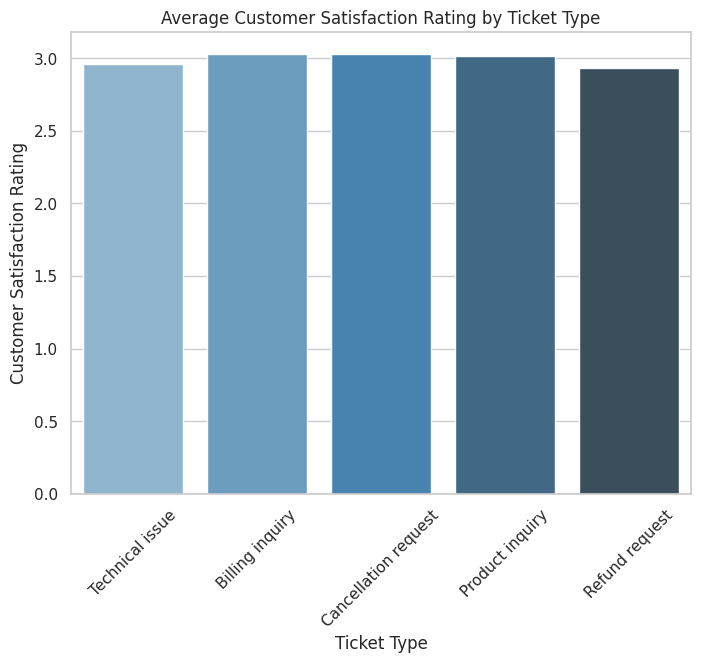

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Bar Plot (Average Customer Satisfaction Rating per Ticket Type)
plt.figure(figsize=(8, 6))
sns.barplot(x='Ticket Type', y='Customer Satisfaction Rating', data=support_ticket_clean, ci=None, palette='Blues_d')
plt.title('Average Customer Satisfaction Rating by Ticket Type')
plt.xticks(rotation=45)
plt.show()

Time Series Analysis

<ipython-input-72-cb9815918680>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



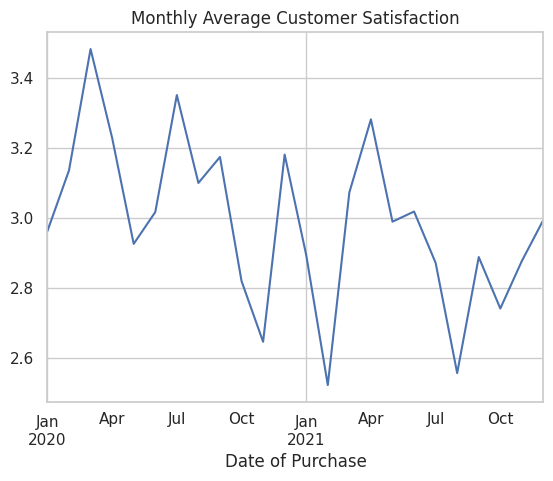

In [72]:
merged_data['Date of Purchase'] = pd.to_datetime(merged_data['Date of Purchase'])
merged_data.set_index('Date of Purchase', inplace=True)
merged_data.resample('M')['Customer Satisfaction Rating'].mean().plot()
plt.title("Monthly Average Customer Satisfaction")
plt.show()

Heatmap of Satisfaction Ratings vs. Ticket Characteristics

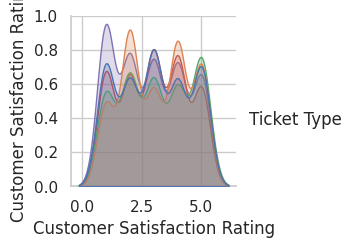

In [71]:
sns.pairplot(merged_data[['First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'Ticket Type']], hue='Ticket Type')
plt.show()